In [1]:
from fastai import *
from fastai.vision import *
from fastai.metrics import *

from SpeedDataset import SpeedDataset

In [2]:
fname = 'labels.csv'
path_img = 'vidCaps/'

In [3]:
df = pd.read_csv(fname)
df.head()

,image,label
0,28.105569_0.jpg,28.105569
1,28.105569_1.jpg,28.105569
2,28.106527_2.jpg,28.106527
3,28.130404_3.jpg,28.130404
4,28.109243_4.jpg,28.109243


In [4]:
data = (ImageList.from_df(df, path_img, cols='image')
        .random_split_by_pct()
        .label_from_df('label')
        .databunch()
       ) 

/home/andrew/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")


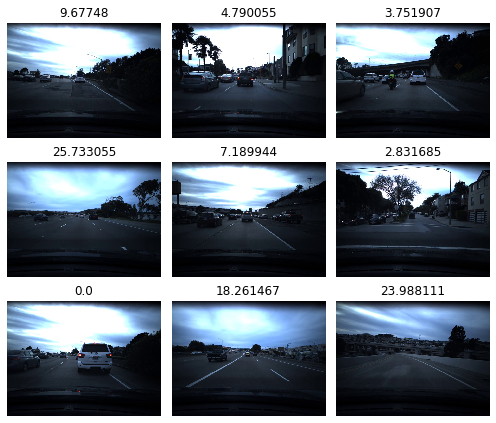

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,35.465698,6.221386,0.970588,02:53
1,8.329936,2.707733,0.970588,02:45
2,5.172058,1.309760,0.970588,02:43
3,4.425009,1.099258,0.970588,02:41


In [8]:
learn.save('stage-1')